# Importing Libraries

In [1]:
import pandas as pd
# from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud

import string #used to obtain information in the string and manipulate the string overall

import warnings
import re #used as a regular expression to find particular patterns and process it

#plotting
import seaborn as sns
import matplotlib.pyplot as plt



import statsmodels as sm
from scipy.stats import zscore
from statsmodels.formula.api import ols
from statsmodels.api import OLS


#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

import graphviz

import nltk #a natural language processing toolkit module associated in anaconda
from nltk import PorterStemmer
# import nltk('words')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scraping the Data

In [3]:
val = input("Enter your Topic: ")

In [4]:
scraper = sntwitter.TwitterSearchScraper(val)

In [5]:
scraper


In [6]:
for tweet in scraper.get_items():
    break

In [7]:
print(type(tweet))

<class 'snscrape.modules.twitter.Tweet'>


In [8]:
tweet


Tweet(url='https://twitter.com/Gurdeep_Gujral/status/1522174526804561920', date=datetime.datetime(2022, 5, 5, 11, 21, 2, tzinfo=datetime.timezone.utc), rawContent='Very bad service by #anantcar for one small thing they making me call from past 45 days #anandmahindra #mahindrrise #mahindrathar', renderedContent='Very bad service by #anantcar for one small thing they making me call from past 45 days #anandmahindra #mahindrrise #mahindrathar', id=1522174526804561920, user=User(username='Gurdeep_Gujral', id=422103895, displayname='Gurdeep Gujral', rawDescription='Director & Co-Founder at Wroots Global Private Limited', renderedDescription='Director & Co-Founder at Wroots Global Private Limited', descriptionLinks=None, verified=False, created=datetime.datetime(2011, 11, 26, 20, 27, 33, tzinfo=datetime.timezone.utc), followersCount=58, friendsCount=47, statusesCount=44, favouritesCount=9, listedCount=0, mediaCount=2, location='Bangalore', protected=False, link=TextLink(text='wrootsglobal.com

In [8]:
Limit = int(input("Enter the number of tweet you want to analyse: "))

In [9]:
scraper = sntwitter.TwitterSearchScraper(val)

tweets = []

for i,tweet in enumerate(scraper.get_items()):
    data = [
        tweet.date,
        tweet.id,
        tweet.content,
        tweet.username,
        tweet.likeCount,
        tweet.retweetCount
    ]
    tweets.append(data)
    if i > (Limit):
        break


In [10]:
tweet_df = pd.DataFrame(
    tweets, columns = ["date","id","content","username","likeCount","retweetCount"]
)

In [11]:
dp=tweet_df

In [12]:
dp

,date,id,content,username,likeCount,retweetCount
0,2023-03-12 12:18:49+00:00,1634891695308562433,.@JioCare Absolutely disappointing customer se...,Devils_vaqeel,0,0
1,2023-03-12 12:18:00+00:00,1634891488919425029,@JioCare Transaction is successful but still a...,ahkam_ul_haq,1,0
2,2023-03-12 12:17:54+00:00,1634891462872641536,"@arpandubey300 We understand your concern, Arp...",JioCare,0,0
3,2023-03-12 12:16:32+00:00,1634891118897688584,"@jaibharat1099 Hi, we understand your concern....",JioCare,0,0
4,2023-03-12 12:16:11+00:00,1634891031203151877,"@nordiacbeast Hi Akash, we would be glad to ha...",JioCare,0,0
5,2023-03-12 12:15:30+00:00,1634890858112876544,@JioCare Thank you so much. I will be expectin...,NandyNandeesh,0,0
6,2023-03-12 12:14:51+00:00,1634890694891560961,Hello People\nAre you also facing network issu...,tagra_shivam,0,0
7,2023-03-12 12:14:50+00:00,1634890693662371842,@ahkam_ul_haq money. It is possible that the t...,JioCare,1,0
8,2023-03-12 12:14:50+00:00,1634890691095457792,@Mayank81200533 notified about the same – Shar...,JioCare,0,0
9,2023-03-12 12:14:49+00:00,1634890689388453888,"@ahkam_ul_haq HI Ahkam, we understand your con...",JioCare,0,0


In [13]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          12 non-null     datetime64[ns, UTC]
 1   id            12 non-null     int64              
 2   content       12 non-null     object             
 3   username      12 non-null     object             
 4   likeCount     12 non-null     int64              
 5   retweetCount  12 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 704.0+ bytes


In [14]:
scraper = sntwitter.TwitterSearchScraper(val)

tweets = []

for i,tweet in enumerate(scraper.get_items()):
    data = [
        tweet.content,
    ]
    tweets.append(data)
    if i > (Limit):
        break

In [15]:
df = pd.DataFrame(
    tweets, columns = ["Tweets"]
)

In [16]:
df

,Tweets
0,.@JioCare Absolutely disappointing customer se...
1,"@arpandubey300 We understand your concern, Arp..."
2,"@jaibharat1099 Hi, we understand your concern...."
3,"@nordiacbeast Hi Akash, we would be glad to ha..."
4,@JioCare Thank you so much. I will be expectin...
5,Hello People\nAre you also facing network issu...
6,@ahkam_ul_haq money. It is possible that the t...
7,@Mayank81200533 notified about the same – Shar...
8,"@ahkam_ul_haq HI Ahkam, we understand your con..."
9,"@Mayank81200533 Hi Mayank, we regret for the i..."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  12 non-null     object
dtypes: object(1)
memory usage: 224.0+ bytes


# Data Cleaning

In [19]:
plt.style.use("fivethirtyeight")

In [121]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # r do heare it tell python it is raw string
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text) # remove retweet sub tree
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyper link
    text = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE).sub(r'',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [20]:
# Defining stopwords

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Tweets'] = df['Tweets'].apply(lambda text: cleaning_stopwords(text))
df['Tweets'].tail()

7              @Mayank81200533 notified – Sharath (2/2)
8     @ahkam_ul_haq HI Ahkam, understand concern. At...
9     @Mayank81200533 Hi Mayank, regret inconvenienc...
10    @NandyNandeesh Hey Nandeesh, understand concer...
11                     @JioCare sent persnal details dm
Name: Tweets, dtype: object

In [22]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [125]:
#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

NLTK stop word lists 

{'during', 'herself', 'if', 've', 'out', 'further', 'we', 's', 'your', 'our', "hadn't", 'and', 'he', 'once', 'm', 'haven', "you'll", 'it', "isn't", 'was', "shan't", 'o', 'between', 'not', 'have', 'don', 'she', 'shouldn', 'yourselves', "she's", 'isn', 'there', 'yourself', 'until', 'under', 'that', "won't", 'doing', 'how', 'yours', "should've", 'him', 'themselves', 'having', 'they', 'hadn', 'but', "hasn't", 're', 'is', 'you', 'after', 'are', 'of', 'here', 'y', 'didn', 'by', 'weren', 'for', 'did', 'down', 'than', "you'd", "wasn't", 'too', 'll', 'ours', 'up', "mightn't", 'no', "shouldn't", "you've", 'me', 'what', 'very', 'hasn', 'over', 'couldn', 'its', 'an', "don't", 'when', "weren't", 'with', 'such', 'ourselves', 'in', 'other', 'mightn', 'my', 'been', "couldn't", 'i', 'will', 'ma', 'while', 'this', 'against', 'mustn', 'nor', 'into', 'won', 'or', 'needn', "didn't", 'being', 'his', 'doesn', 'each', 'some', 'same', 'all', 'now', 'aren', 'to', 'why', 'few', 'has', 'the

In [126]:
#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [127]:
df['Tweets']=df['Tweets'].apply(remove_stopwords)
df['Tweets'].tail()

97     Hi Shashikant , understand concern. Please cli...
98                                                      
99                                                      
100           game many fans ' die hard fan Thankyou jio
101    Aap Kisi type ke subscription ka wait e mat ki...
Name: Tweets, dtype: object

In [128]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_URLs(x))
df['Tweets'].head()

0                                             _hurryup
1                                           kemmy lang
2    5G phone bhi le liya hai ab 5G network yeh tum...
3    getting benefit Jio Welcome Offer , need activ...
4    Hey Yash , thank taking time busy schedule sha...
Name: Tweets, dtype: object

In [129]:
# fucntion to removes pattern in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [130]:
# remove twitter handles (@user)

df['Tweets'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")
df['Tweets'].head()

0                                             _hurryup
1                                           kemmy lang
2    5G phone bhi le liya hai ab 5G network yeh tum...
3    getting benefit Jio Welcome Offer , need activ...
4    Hey Yash , thank taking time busy schedule sha...
Name: Tweets, dtype: object

In [131]:
# remove short words

df['Tweets'] = df['Tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['Tweets'].head()

0                                             _hurryup
1                                           kemmy lang
2    phone liya network tumhara kehneko chalta thak...
3    getting benefit Welcome Offer need active Post...
4    Yash thank taking time busy schedule sharing J...
Name: Tweets, dtype: object

In [132]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
df['Tweets'] = df['Tweets'].apply(tokenizer.tokenize)
df['Tweets'].head()

0                                           [_hurryup]
1                                        [kemmy, lang]
2    [phone, liya, network, tumhara, kehneko, chalt...
3    [getting, benefit, Welcome, Offer, need, activ...
4    [Yash, thank, taking, time, busy, schedule, sh...
Name: Tweets, dtype: object

# EDA

In [133]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['Tweets']= df['Tweets'].apply(lambda x: stemming_on_text(x))
df['Tweets'].head()

0                                           [_hurryup]
1                                        [kemmy, lang]
2    [phone, liya, network, tumhara, kehneko, chalt...
3    [getting, benefit, Welcome, Offer, need, activ...
4    [Yash, thank, taking, time, busy, schedule, sh...
Name: Tweets, dtype: object

In [134]:
#download package for lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JOYTI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\JOYTI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [135]:
# Applying Lemmatization


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
df['Tweets'] = df['Tweets'].apply(lambda x: lemmatizer_on_text(x))
df['Tweets'].head()


0                                             _hurryup
1                                           kemmy lang
2    phone liya network tumhara kehneko chalta thak...
3    getting benefit Welcome Offer need active Post...
4    Yash thank taking time busy schedule sharing J...
Name: Tweets, dtype: object

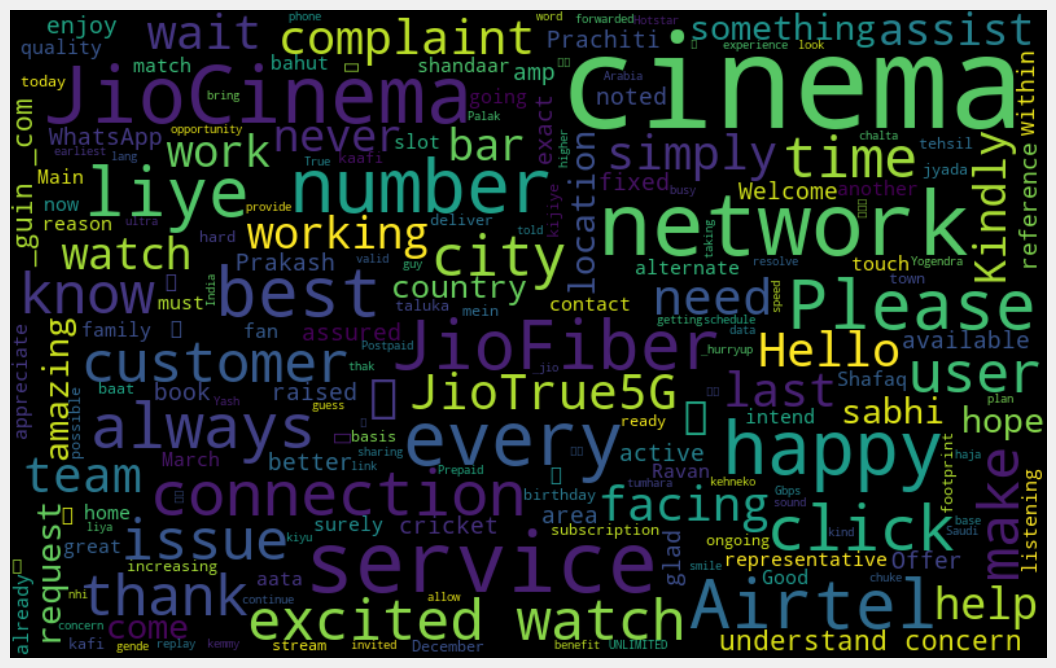

In [136]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['Tweets']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [137]:
# # frequent words visualization for +ve

# all_words = " ".join([sentence for sentence in df['Tweets'][df['Tweets']==1]])

# wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# # plot the graph
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [138]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creat two columns 

df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

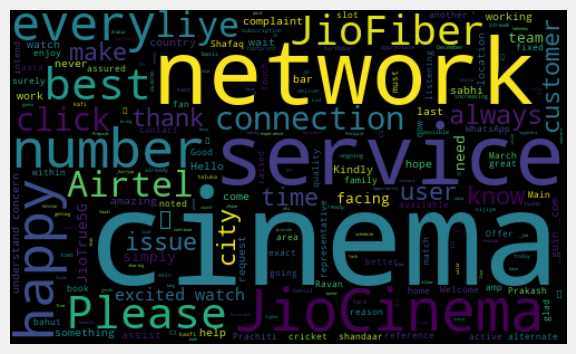

In [139]:
allwords = ' '.join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width = 500,height = 300,random_state = 21,max_font_size = 119).generate(allwords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [140]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df["Analysis"] = df["Polarity"].apply(getAnalysis)

In [141]:
j=1
sortedDF = df.sort_values(by = ["Polarity"])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == 'Positive'):
        print(str(j)+')'+sortedDF["Tweets"][i])
        print()
        j = j+1

1)Yash thank taking time busy schedule sharing JioTrue5G experience kind word bring smile True customer invited Welcome Offer enjoy UNLIMITED data speed Gbps continue

2)told guy sound like

3)ultra better guess

4)Yogendra allow opportunity look you Simply click link amp exact issue facing using service checked Prakash

5)Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart

6)Ravya would glad onboard book JioFiber service click simply Hello 7000870008 WhatsApp JioFiber available area representative surely touch Afrin

7)Thanks service whole last year definitely make wait service 25th March happy customer Airtel transmitted Perfect Jio

8)_hair Aircel wale mostly convert

9)major issue network resolved within 6hrs time

10)know match also happy Cinema

11)Main iske liye dhanyvad Dena chahta JioCinema

12)never intend down Please number alternate contact number exact network is

In [142]:
j=1
sortedDF = df.sort_values(by = ["Polarity"],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == 'Negative'):
        print(str(j)+')'+sortedDF["Tweets"][i])
        print()
        j = j+1

1)getting benefit Welcome Offer need active Postpaid connection valid active Prepaid base plan 239 higher Prachiti

2)Almost working well Airtel like every device eats battery faster complaint

3)seems Airtel listening complaint Airtel black wifi working last day tired complaining nobody listening Kindly disconnect line interested now please connect

4)_kahar Hello Mohit always help Please informed unable pull JioFiber detail request share order reference number begin NO000XX registered mobile number assist further Prasanna

5)jio5g jiojio jiofiber MukeshAmbani srajesh jioceo jiocare chasing relocation last 10days multiple rejection engineer reason slot connection raised request connection slot fiberbox worst customer service

6)paid month advance march extreme fiber connection office need 24 7 promised sale team connection date till today response installation I preferred airtel thinking

7)Thank make possible hard

8)_guin _com failed virginity test Ravan

9)game many fan hard Thanky

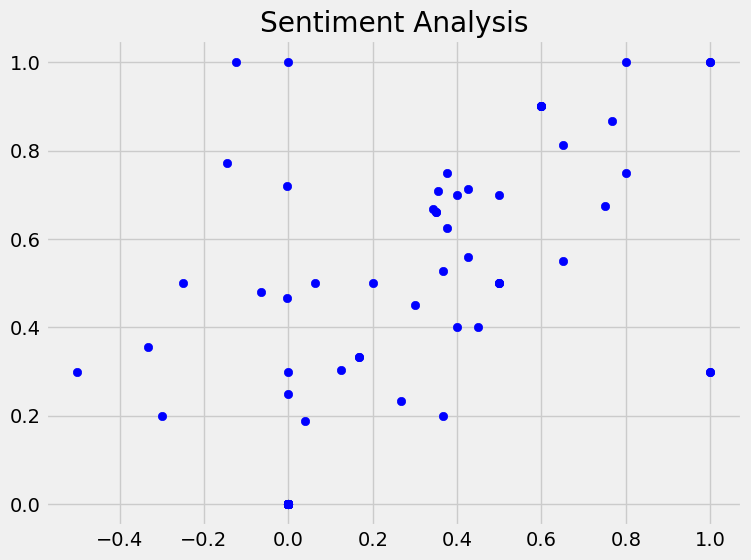

In [143]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color = 'Blue')

plt.title("Sentiment Analysis")
plt.show()

In [144]:
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets["Tweets"]

ptweets

4     Yash thank taking time busy schedule sharing J...
8                                   told guy sound like
12                                   ultra better guess
13    Yogendra allow opportunity look you Simply cli...
15    Anshuman regret inconvenience caused you raise...
16    Ravya would glad onboard book JioFiber service...
17    Thanks service whole last year definitely make...
19                     _hair Aircel wale mostly convert
20        major issue network resolved within 6hrs time
29                         know match also happy Cinema
31        Main iske liye dhanyvad Dena chahta JioCinema
34    never intend down Please number alternate cont...
37                                 catching school work
38    _bhargav glad part family book JioFiber servic...
39       time going spectacular enjoy Cinema App Cinema
42    always something better user must know fan pra...
43                   something wonderful people imitate
46                 Cinema never disappoint amazi

In [145]:
round((ptweets.shape[0] / df.shape[0]) * 100 , 1)

38.2

In [146]:
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets["Tweets"]

ntweets

3      getting benefit Welcome Offer need active Post...
27     Almost working well Airtel like every device e...
40     seems Airtel listening complaint Airtel black ...
45     _kahar Hello Mohit always help Please informed...
55     jio5g jiojio jiofiber MukeshAmbani srajesh jio...
88     paid month advance march extreme fiber connect...
92                              Thank make possible hard
94                _guin _com failed virginity test Ravan
100                          game many fan hard Thankyou
Name: Tweets, dtype: object

In [147]:
round((ntweets.shape[0] / df.shape[0]) * 100 , 1)

8.8

In [148]:
df["Analysis"].value_counts()

Neutral     54
Positive    39
Negative     9
Name: Analysis, dtype: int64

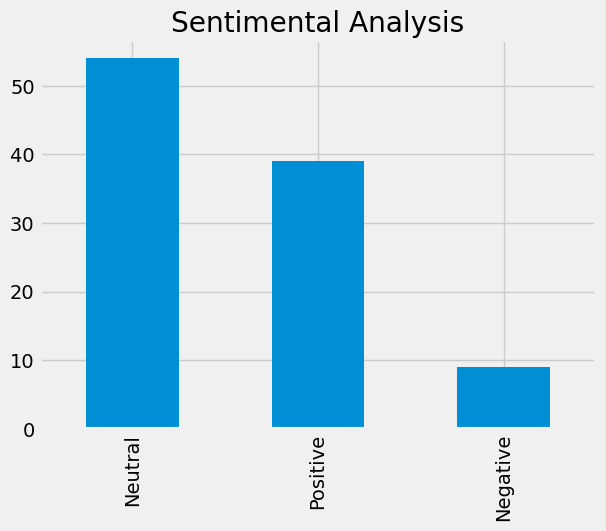

In [149]:
plt.title("Sentimental Analysis")
df["Analysis"].value_counts().plot(kind = 'bar')
plt.show()

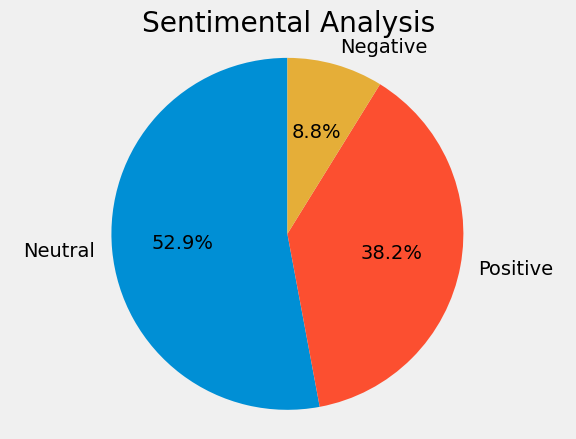

In [150]:
labels = ['Neutral', 'Positive','Negative']
sizes = df['Analysis'].value_counts()

# create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Sentimental Analysis")

# show chart
plt.show()

# Modelling

In [151]:
x=df[['Tweets', 'Subjectivity', 'Polarity']]
x.head()

,Tweets,Subjectivity,Polarity
0,_hurryup,0.000000,0.000000
1,kemmy lang,0.000000,0.000000
2,phone liya network tumhara kehneko chalta thak...,0.000000,0.000000
3,getting benefit Welcome Offer need active Post...,0.720000,-0.003333
4,Yash thank taking time busy schedule sharing J...,0.558333,0.425000


In [152]:
y=df['Analysis']
y.head()

0     Neutral
1     Neutral
2     Neutral
3    Negative
4    Positive
Name: Analysis, dtype: object

In [153]:
# # Tokenizing the text

# tokenizer = RegexpTokenizer(r'\w+')
# df['text'] = df['Analysis'].apply(tokenizer.tokenize)
# df['text'].head()

#we can also do the same for above 

In [154]:
x_data_final= pd.get_dummies(x,drop_first=True) 
x_data_final.head() 

,Subjectivity,Polarity,Tweets_Airtel क फ सस त BSNL प ल न ब न फ ट स ज एग RechargePlan,Tweets_Akash appreciate interest service Kindly click know location JioTrue5G ready increasing footprint city city ongoing basis December 2023 deliver every town,Tweets_Almost working well Airtel like every device eats battery faster complaint,Tweets_Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart,Tweets_Bahit acha kiya walon asli Mzaa aata JioCinema,Tweets_Cinema never disappoint amazing work,Tweets_Cinema provide replay like Hotstar,Tweets_Cinema watch spider feed even commercial imagine,...,Tweets_time going spectacular enjoy Cinema App Cinema,Tweets_time really exciting always make something best JioCinema,Tweets_told guy sound like,Tweets_ultra better guess,Tweets_understand concern Please assured noted concern forwarded team resolve earliest Palak,Tweets_update recent ochinda,Tweets_user there subscription come free recharge right,Tweets_yang udah pernah baca beluum reviewnya dong,Tweets_भ जप ई कपकप व पक ष फ लह ल,Tweets_ᵔᗜᵔ
0,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.720000,-0.003333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.558333,0.425000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert numpy to dataframe

In [155]:
x_data_final
print(type(x_data_final))
x_data=pd.DataFrame(x_data_final)
print(type(x_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# label encoding

In [156]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y_data_final=labelencoder_y.fit_transform(y)
print(type(y_data_final))
print(y_data_final)

y_data=pd.DataFrame(y_data_final)
print(type(y_data))

<class 'numpy.ndarray'>
[1 1 1 0 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1 1 1 1 1 0 1 2 1 2 1 1 2 1 1
 2 2 2 0 1 2 2 1 0 2 2 1 2 2 2 1 1 1 0 1 2 2 1 1 1 2 2 2 1 1 1 1 2 1 2 1 1
 1 2 1 1 2 2 2 1 1 2 1 2 1 2 0 1 2 2 0 1 0 1 1 2 1 1 0 1]
<class 'pandas.core.frame.DataFrame'>


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)
x_train.head()

,Subjectivity,Polarity,Tweets_Airtel क फ सस त BSNL प ल न ब न फ ट स ज एग RechargePlan,Tweets_Akash appreciate interest service Kindly click know location JioTrue5G ready increasing footprint city city ongoing basis December 2023 deliver every town,Tweets_Almost working well Airtel like every device eats battery faster complaint,Tweets_Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart,Tweets_Bahit acha kiya walon asli Mzaa aata JioCinema,Tweets_Cinema never disappoint amazing work,Tweets_Cinema provide replay like Hotstar,Tweets_Cinema watch spider feed even commercial imagine,...,Tweets_time going spectacular enjoy Cinema App Cinema,Tweets_time really exciting always make something best JioCinema,Tweets_told guy sound like,Tweets_ultra better guess,Tweets_understand concern Please assured noted concern forwarded team resolve earliest Palak,Tweets_update recent ochinda,Tweets_user there subscription come free recharge right,Tweets_yang udah pernah baca beluum reviewnya dong,Tweets_भ जप ई कपकप व पक ष फ लह ल,Tweets_ᵔᗜᵔ
62,0.667857,0.342857,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.720000,-0.003333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0.712963,0.425000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0.500000,-0.250000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
# TFIDF : Extracting Tf-idf features

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

In [159]:
tfidf.fit(list(x_train) + list(x_test))
X_train_tfidf = tfidf.transform(x_train)
X_val_tfidf = tfidf.transform(x_test)

In [160]:
# Count Vector approach (Bag of words approach)
# PS: We are not building any models using this approach as we are doing with Tf-IDF.

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
count_vec.fit(list(x_train) + list(x_test))

X_train_count_vec = count_vec.transform(x_train)
X_val_count_vec = count_vec.transform(x_test)



In [161]:
scores_dict_tfid={}

In [162]:
scores_dict_tfid

{}

In [163]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,_hurryup,0.000000,0.000000,Neutral
1,kemmy lang,0.000000,0.000000,Neutral
2,phone liya network tumhara kehneko chalta thak...,0.000000,0.000000,Neutral
3,getting benefit Welcome Offer need active Post...,0.720000,-0.003333,Negative
4,Yash thank taking time busy schedule sharing J...,0.558333,0.425000,Positive
...,...,...,...,...
97,Shashikant understand concern Please click kno...,0.500000,0.200000,Positive
98,,0.000000,0.000000,Neutral
99,,0.000000,0.000000,Neutral
100,game many fan hard Thankyou,0.480556,-0.063889,Negative


# Model 1 : Logistic Regression

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)
x_train.head()

,Subjectivity,Polarity,Tweets_Airtel क फ सस त BSNL प ल न ब न फ ट स ज एग RechargePlan,Tweets_Akash appreciate interest service Kindly click know location JioTrue5G ready increasing footprint city city ongoing basis December 2023 deliver every town,Tweets_Almost working well Airtel like every device eats battery faster complaint,Tweets_Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart,Tweets_Bahit acha kiya walon asli Mzaa aata JioCinema,Tweets_Cinema never disappoint amazing work,Tweets_Cinema provide replay like Hotstar,Tweets_Cinema watch spider feed even commercial imagine,...,Tweets_time going spectacular enjoy Cinema App Cinema,Tweets_time really exciting always make something best JioCinema,Tweets_told guy sound like,Tweets_ultra better guess,Tweets_understand concern Please assured noted concern forwarded team resolve earliest Palak,Tweets_update recent ochinda,Tweets_user there subscription come free recharge right,Tweets_yang udah pernah baca beluum reviewnya dong,Tweets_भ जप ई कपकप व पक ष फ लह ल,Tweets_ᵔᗜᵔ
62,0.667857,0.342857,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.720000,-0.003333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0.712963,0.425000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0.500000,-0.250000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [166]:
logreg=LogisticRegression(random_state = 0)

In [167]:
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [168]:
logreg.score(x_test, y_test)

0.8095238095238095

In [169]:
y_predict = logreg.predict(x_test)

In [170]:
print(classification_report(y_test,y_predict))
print("confusion matrix")
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      1.00      0.90        13
           2       0.80      0.80      0.80         5

    accuracy                           0.81        21
   macro avg       0.54      0.60      0.57        21
weighted avg       0.69      0.81      0.75        21

confusion matrix
[[ 0  2  1]
 [ 0 13  0]
 [ 0  1  4]]


In [171]:
scores_dict_tfid['Logistic Regression(tfid)']=accuracy_score(y_predict,y_test)

In [172]:
df.columns

Index(['Tweets', 'Subjectivity', 'Polarity', 'Analysis'], dtype='object')

# Model 2 a : Decision Tree 

In [173]:
x_train_4,x_test_4,y_train_4,y_test_4=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
x_train_4.head()   

,Subjectivity,Polarity,Tweets_Airtel क फ सस त BSNL प ल न ब न फ ट स ज एग RechargePlan,Tweets_Akash appreciate interest service Kindly click know location JioTrue5G ready increasing footprint city city ongoing basis December 2023 deliver every town,Tweets_Almost working well Airtel like every device eats battery faster complaint,Tweets_Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart,Tweets_Bahit acha kiya walon asli Mzaa aata JioCinema,Tweets_Cinema never disappoint amazing work,Tweets_Cinema provide replay like Hotstar,Tweets_Cinema watch spider feed even commercial imagine,...,Tweets_time going spectacular enjoy Cinema App Cinema,Tweets_time really exciting always make something best JioCinema,Tweets_told guy sound like,Tweets_ultra better guess,Tweets_understand concern Please assured noted concern forwarded team resolve earliest Palak,Tweets_update recent ochinda,Tweets_user there subscription come free recharge right,Tweets_yang udah pernah baca beluum reviewnya dong,Tweets_भ जप ई कपकप व पक ष फ लह ल,Tweets_ᵔᗜᵔ
53,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [175]:
clf = DecisionTreeClassifier()
clf.fit(x_train_4,y_train_4)
predict4 = clf.predict(x_test_4)
print(classification_report(y_test_4,predict4))
print("confusion matrix")
print(confusion_matrix(y_test_4,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

confusion matrix
[[ 3  0  0]
 [ 0  8  0]
 [ 0  0 10]]


In [176]:
clf.score(x_test_4,y_test_4)

1.0

In [177]:
scores_dict_tfid['Decision tree(tfid)']=accuracy_score(predict4,y_test_4)

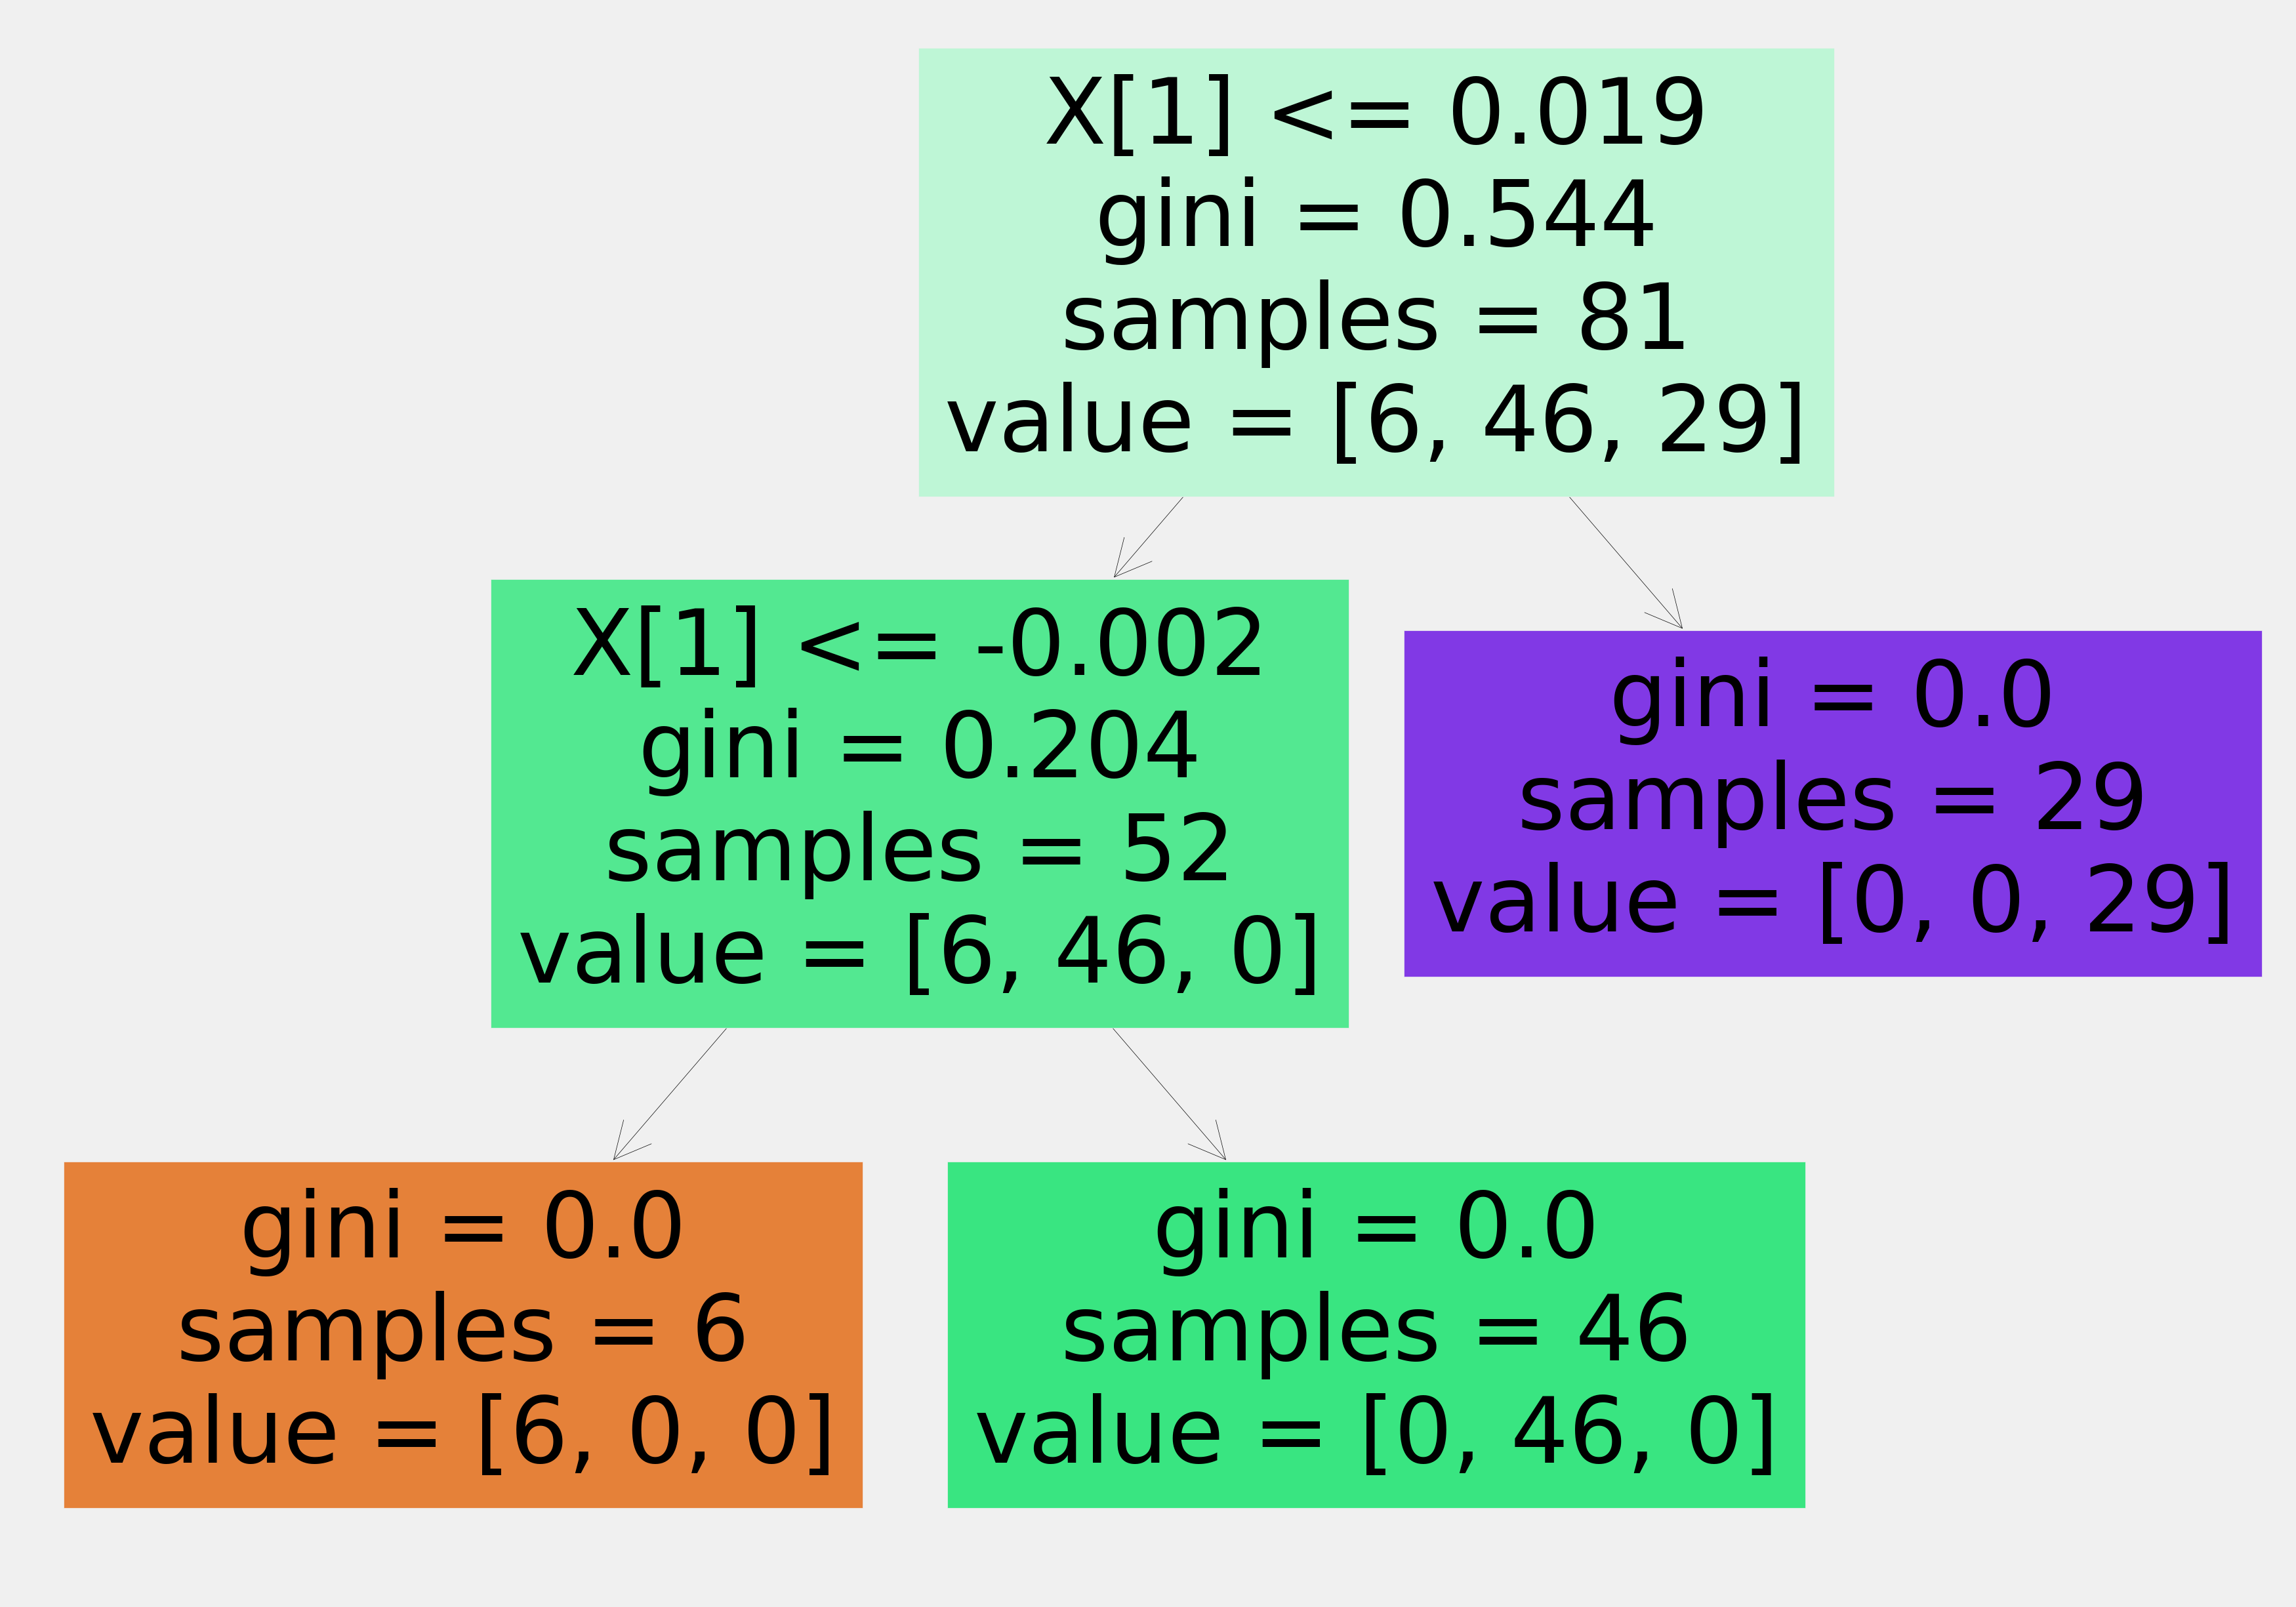

In [178]:
axes=plt.subplots(nrows=1,ncols=1,figsize=(40,30),dpi=100)
tree.plot_tree(clf,filled=True)
plt.show()

# Model 2 b: Decision Tree (entropy)

In [179]:
cds= DecisionTreeClassifier(criterion='entropy', random_state=0)  
cds.fit(x_train, y_train)  
y_pred_4= cds.predict(x_test_4)  

In [180]:
cm= confusion_matrix(y_test_4, y_pred_4)  
cm

array([[ 3,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [181]:
cds.score(x_test_4,y_test_4)


1.0

In [182]:
scores_dict_tfid['Decision tree_entropy(tfid)']=accuracy_score(y_pred_4,y_test_4)

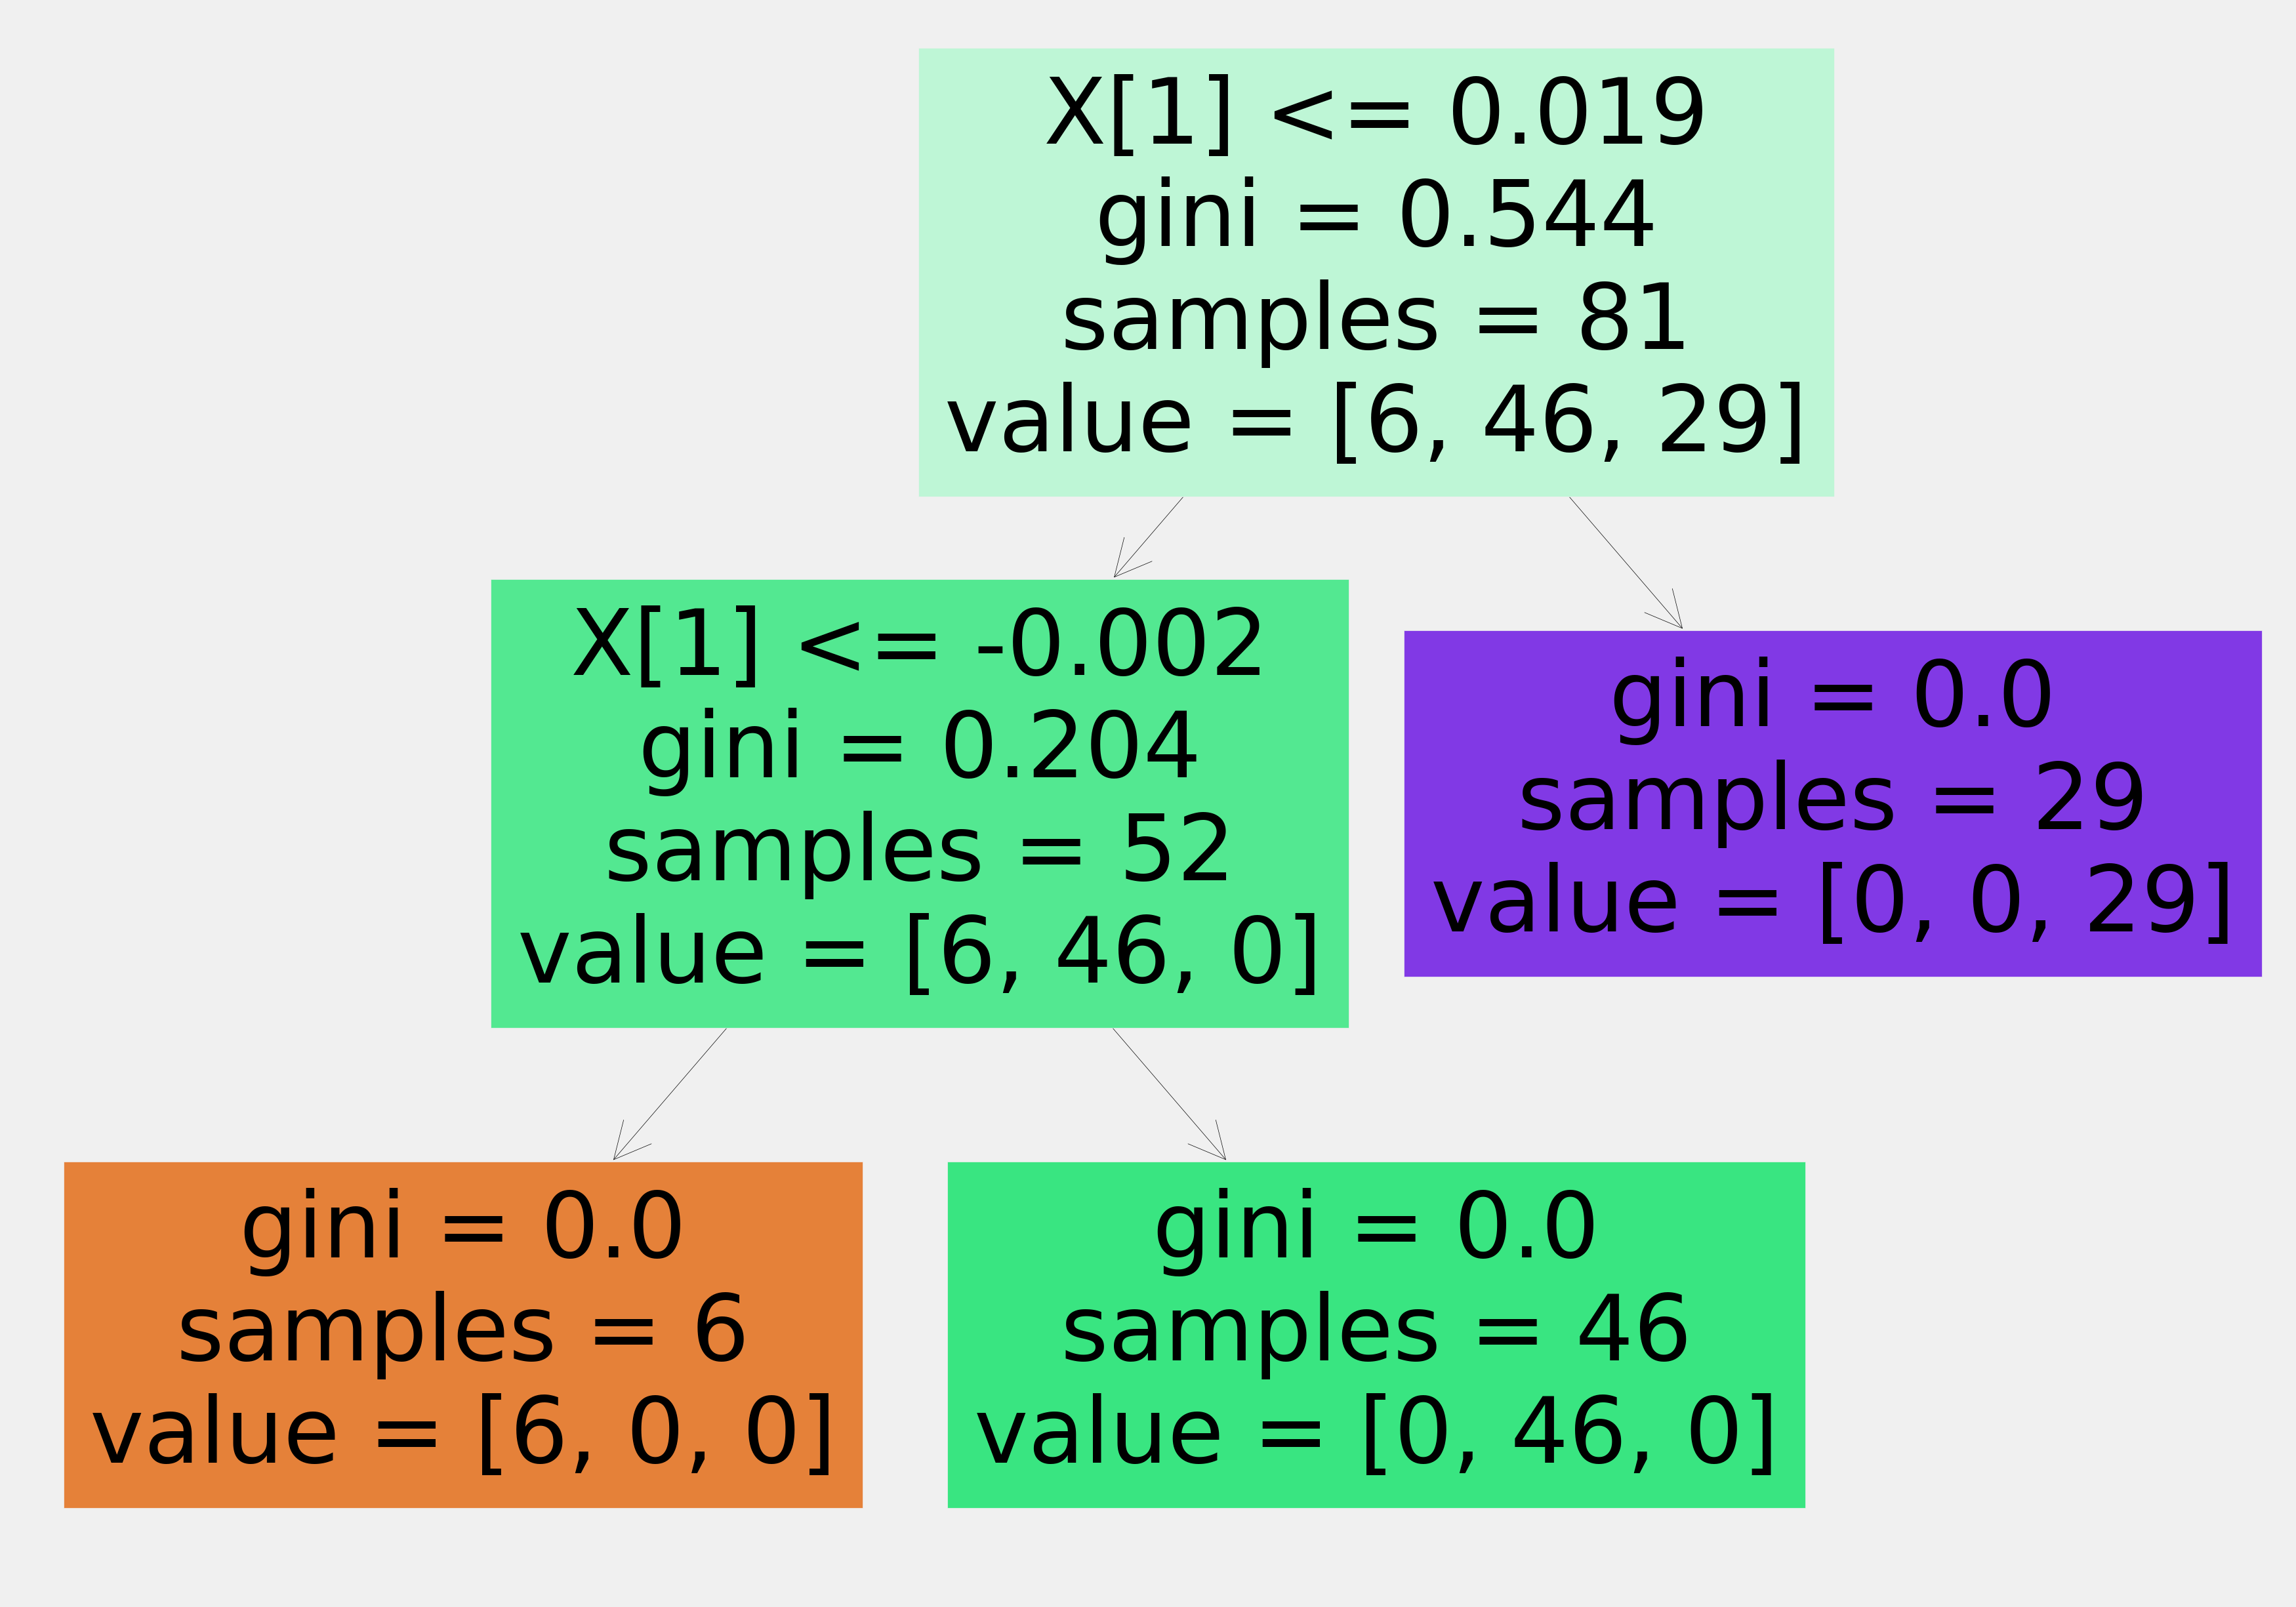

In [183]:
axes=plt.subplots(nrows=1,ncols=1,figsize=(40,30),dpi=100)
tree.plot_tree(clf,filled=True)
plt.show()

# Model 3 : Random Forestry

In [184]:
x_train_5,x_test_5,y_train_5,y_test_5=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
x_train_5.head()   

,Subjectivity,Polarity,Tweets_Airtel क फ सस त BSNL प ल न ब न फ ट स ज एग RechargePlan,Tweets_Akash appreciate interest service Kindly click know location JioTrue5G ready increasing footprint city city ongoing basis December 2023 deliver every town,Tweets_Almost working well Airtel like every device eats battery faster complaint,Tweets_Anshuman regret inconvenience caused you raised complaint reference number 678528417536 assure fixed within hour Assuring best service always Regards Team JioMart,Tweets_Bahit acha kiya walon asli Mzaa aata JioCinema,Tweets_Cinema never disappoint amazing work,Tweets_Cinema provide replay like Hotstar,Tweets_Cinema watch spider feed even commercial imagine,...,Tweets_time going spectacular enjoy Cinema App Cinema,Tweets_time really exciting always make something best JioCinema,Tweets_told guy sound like,Tweets_ultra better guess,Tweets_understand concern Please assured noted concern forwarded team resolve earliest Palak,Tweets_update recent ochinda,Tweets_user there subscription come free recharge right,Tweets_yang udah pernah baca beluum reviewnya dong,Tweets_भ जप ई कपकप व पक ष फ लह ल,Tweets_ᵔᗜᵔ
53,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
from sklearn.ensemble import RandomForestClassifier


In [186]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',verbose = 2,max_depth=12)
rf.fit(x_train_5,y_train_5)
rf.score(x_train_5,y_train_5)    #n_estimator= no.of trees in Random Forest(hyper parameter)
y_pred=rf.predict(x_test_5)

# predict5 = clf.predict(x_test_5)


print(classification_report(y_test_5,y_pred))
print("confusion matrix")
print(confusion_matrix(y_test_5,y_pred))

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [187]:
rf.score(x_test_5,y_test_5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9047619047619048

In [188]:
scores_dict_tfid['Random Forest(tfid)']=accuracy_score(y_pred,y_test_5)

# Model 4 : SVM

In [189]:
from sklearn.svm import SVC

In [190]:
x_train_7 , x_test_7 ,y_train_7 , y_test_7 = train_test_split(x_data,y_data, test_size=0.2 ,random_state=0)

In [191]:
cls = SVC(kernel="linear",random_state=0)
cls.fit(x_train_7,y_train_7)
y_pred_7 = cls.predict(x_test_7)

In [192]:
cm = confusion_matrix(y_test_7 , y_pred_7)
cm

array([[ 1,  2,  0],
       [ 0, 13,  0],
       [ 0,  1,  4]], dtype=int64)

In [193]:
cls.score(x_test_7,y_test_7)

0.8571428571428571

In [194]:
scores_dict_tfid['SVM(tfid)']=accuracy_score(y_pred_7,y_test_7)

# Model 5 : Naive Bayes

In [195]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(x_data, y_data, test_size=0.5, random_state=0)
gnb = GaussianNB()

y_pred_8 = gnb.fit(x_train_8, y_train_8).predict(x_test_8)

In [196]:
cm=confusion_matrix(y_test_8,y_pred_8)
cm

array([[ 7,  0,  0],
       [29,  0,  0],
       [11,  0,  4]], dtype=int64)

In [197]:
gnb.score(x_test_8,y_test_8)

0.21568627450980393

In [198]:
scores_dict_tfid['Naive Bayes(tfid)']=accuracy_score(y_pred_8,y_test_8)

# model 6: ensemble

In [199]:
from sklearn.ensemble import VotingClassifier

# Splitting between train data into training and validation dataset
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_data, y_data, test_size=0.20,random_state=0)

# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('lr', model_1), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(x_train5, y_train5)

# predicting the output on the test dataset
pred_final5 = final_model.predict(x_test5)

# printing log loss between actual and predicted value
print("Classification matrix \n",classification_report(y_test5, pred_final5))
print("*"*90)
print("Confusion matrix \n",confusion_matrix(y_test5,pred_final5))
print("*"*90)
print("Accuracy \n",final_model.score(x_test5,y_test5))

Classification matrix 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.93      1.00      0.96        13
           2       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.98      0.93      0.95        21
weighted avg       0.96      0.95      0.95        21

******************************************************************************************
Confusion matrix 
 [[ 3  0  0]
 [ 0 13  0]
 [ 0  1  4]]
******************************************************************************************
Accuracy 
 0.9523809523809523


In [200]:
scores_dict_tfid['Ensemble(tfid)']=accuracy_score(pred_final5,y_test5)

# Model Comparision

In [201]:
scores_dict_tfid

{'Logistic Regression(tfid)': 0.8095238095238095,
 'Decision tree(tfid)': 1.0,
 'Decision tree_entropy(tfid)': 1.0,
 'Random Forest(tfid)': 0.9047619047619048,
 'SVM(tfid)': 0.8571428571428571,
 'Naive Bayes(tfid)': 0.21568627450980393,
 'Ensemble(tfid)': 0.9523809523809523}